# Assignment 3

#### MACS 30000, Instructor Dr. Evans
#### Ken Chen

## Problem 1

Multi-agent systems and its subset, cellular automata, empower the analysis of theoretical construct founded upon micro-level individual behavior and social interactions. It serves a self-testable approach to resolve micro and macro conflictions. However, there are noticeable weaknesses that these models need to overcome:
- Speaking of multi-agent systems, their validity is most chanllenged by lack of theoretical compactness. Simulating collective properties from individual behavior is undoubtedly the most effective way to implement vast number of 'experiments' and derive a convincing result, but this effctiveness is constrained by how tightly it is linked to the corresponding theoretical base, in other words, how identical an artificial intelligent agent is to a theoretical unit of interest. So far the most models have not been able to generate sufficiently representative agents of underlying theoretical constructs. The author graciously offers tips for future development: **(1) Increase the intellligence of simulated individuals. The author encourages the use of theories and models of rationality that are realistic, understandable, and can be applied in the case of limited knowledge. In particular, theories of rationality need to be extended to learning and adaptation. (2) Also, to humanize the agents more. She propels formalization of all the aspects of psychological theories (emotions, motivations, desire, intent, consciousness). (3) We must determine if it is indeed possible to formalize all types of knowledge—for example, common sense knowledge—and, in this case, what would be the best formalization. This aspect is hinders the model development substantially.**

- In some respects, cellular automa can be viewed as a subset of multiagent systems, in the sense that cellular automa are a particular kind of multiagent system in which the agents have a specific and determined position in a lattice and are homogeneous in their behavior and in their modality of interaction. This homogeneity has popularized the model for its simplicity and readability, especially for spatial analysis. **However, there are side effects: (1) A limitation of cellular automata is the use of synchronous updating of states; we assume that there is a global clock according to which all cells are updated simultaneously, which is unrealizable in most cases. (2) Another important limitation regards the restrictions imposed by spatial structures, establishing that each individual interacts only with a subset of the whole population. This assuamption is easily challenged by wirless connections (like via online socialing tools) and population drifts in real life conditions.** 

Despite these existing drawbacks, simulation models have presented a good number of successful applications and profound insights. One such example is from Forrester(1971), where he studied the stall effects of economic growth on environment, and how this environmental change in turn encumbers economic sustainability. This paradigmatic research exhibits the power of simulation to extract insights from complex dynamics and simultaneous effects. 

Thanks to the nroad set of computational tools, one applicable research question regarding political science from me would be: What is the simultaneous effects between Internet censorship and collective sentiments? The dynamic feedback piece of this question would be, for example, will authoritative censorship effectively slaughter any unwanted affective publics, and how will this change in turn alter the online regulation policies?$

## Problem 2

In [1]:
# Import initial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator
from scipy import stats

### Question: A

In [2]:
def macss_inc_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'init_inc'    : 80000,      #initial income
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to work
        'sd'          : 0.13,       #standard deviation of the income process
        'rho'         : 0.4,        #persistence
        'g'           : 0.025,      #growth rate
        'num_draws'   : 10000,      #simulations
    }
    """ 
    
    # set random seed and generate the log of error terms
    np.random.seed(524)
    inc_errors = np.random.normal(0, p['sd'], (p['lf_years'], p['num_draws']))
    
    # create a matrix of dim (lf_years, num_draws)
    log_inc_mat = np.zeros((p['lf_years'], p['num_draws']))
    
    # fill the log_inc matrix according to the income process and the error term
    log_inc_mat[0,:] = np.log(p['init_inc']) + inc_errors[0,:]
    
    # loop and apply the model
    for yr in np.arange(1, p['lf_years']):
        log_inc_mat[yr,:] = (1-p['rho'])*(np.log(p['init_inc']) + p['g']*yr) +\
                                p['rho']*log_inc_mat[yr-1,:] +\
                                inc_errors[yr,:]
    
    inc_mat = np.exp(log_inc_mat)
    
    return inc_mat

#### Specify the function parameter and simulate the income matrix

In [3]:
profile = {
        'init_inc'    : 80000,      #initial income
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to work
        'sd'          : 0.13,       #standard deviation of the income process
        'rho'         : 0.4,        #persistence
        'g'           : 0.025,      #growth rate
        'num_draws'   : 10000,      #simulations
    }

macss_inc = macss_inc_sim(profile)
print(macss_inc)

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


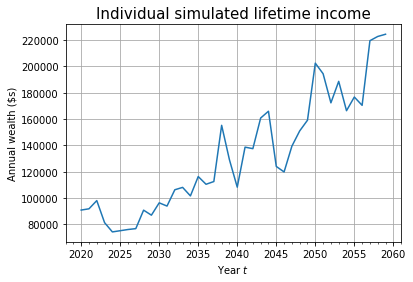

In [4]:
%matplotlib inline
p = profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['lf_years'])
individual = 2020
fig, ax = plt.subplots()
plt.plot(year_vec, macss_inc[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=15)
plt.xlabel('Year $t$')
plt.ylabel(r'Annual wealth (\$s)')
plt.show()

### Question: B

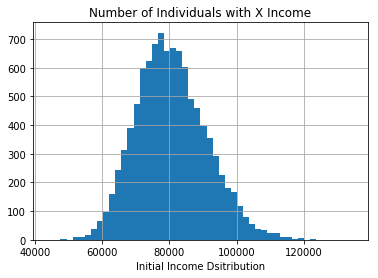

In [5]:
# Plot the histogram of year 2020 incomes
plt.hist(macss_inc[0,:], bins = 50)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel('Initial Income Dsitribution')
plt.title('Number of Individuals with X Income')
plt.show()

In [6]:
# Percent that earn more than 100000
print("Percentage of graduates earn more than 100000: {:.2%} \
        \nPercentage of graduates less more than 70000: {:.2%}".
      format(macss_inc[0,:][(macss_inc[0,:] > 100000)].shape[0]/10000, 
        macss_inc[0,:][(macss_inc[0,:] < 70000)].shape[0]/10000))

Percentage of graduates earn more than 100000: 4.17%         
Percentage of graduates less more than 70000: 15.12%


In [7]:
# Calculate the skewness and kurtosis

print("Skewness: ", stats.skew(macss_inc[0,:]), 
      "\nKurtosis: ", stats.kurtosis(macss_inc[0,:]))

Skewness:  0.40966824837972493 
Kurtosis:  0.3123373591363099


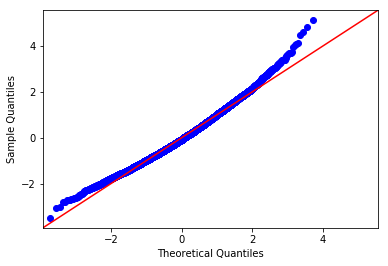

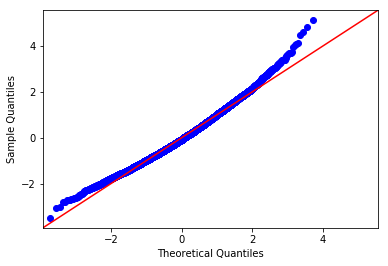

In [8]:
# Draw a quantile to quantile plot to compare its similarity to a standard normal distribution
# Remember to normalize the data first

sm.qqplot((macss_inc[0,:]-macss_inc[0,:].mean())/macss_inc[0,:].std(), line = '45')

The histogram plot looks pretty close to a normal distribution, with its symmetric and bell-curved shape.

To further validate our belief, I calculated skewness, kurtosis and the qqplot, we can see that the distribution of the first year incomes doesn't deviate substantially from a normal distribution, except there are a few outliers on the right tail.

### Question C

In [9]:
# Calculate the cumulative debt payment

macss_debtpay_yr = macss_inc*0.1
macss_debtpay_cum = macss_debtpay_yr.cumsum(axis = 0)

# Calculate how long it takes for a graduate to clear his/her liability
import pandas as pd

macss_debtpay_cumdf = pd.DataFrame(macss_debtpay_cum.T)

years = np.arange(profile['st_year'], profile['st_year']+profile['lf_years']).tolist()
macss_debtpay_cumdf.columns = years
clear_yr = macss_debtpay_cumdf.apply(lambda x: (x<95000).sum()+2020, axis=1)

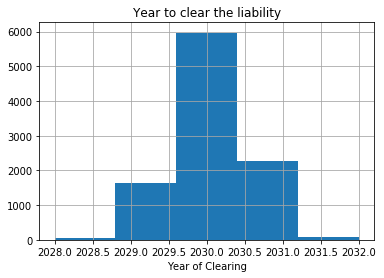

In [10]:
# Plot the histogram of debt clear year

plt.hist(clear_yr, bins = len(clear_yr.unique()))
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel('Year of Clearing')
plt.title('Year to clear the liability')
plt.show()    

In [17]:
perc = (clear_yr < 2030).sum()/10000
print("{:.2%} percent of the MACSS graduates \
managed to pay off the loan within 10 years" \
     .format(perc))

16.78% percent of the MACSS graduates managed to pay off the loan within 10 years


### Question D

In [12]:
# repeat the procedure with the new graaduate profile

profile_new = {
        'init_inc'    : 90000,      #initial income
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to work
        'sd'          : 0.17,       #standard deviation of the income process
        'rho'         : 0.4,        #persistence
        'g'           : 0.025,      #growth rate
        'num_draws'   : 10000,      #simulations
}

macss_inc_new = macss_inc_sim(profile_new)

In [13]:
# Calculate the cumulative debt payment

macss_debtpay_yr_new = macss_inc_new*0.1
macss_debtpay_cum_new = macss_debtpay_yr_new.cumsum(axis = 0)

# Calculate how long it takes for a graduate to clear his/her liability
macss_debtpay_cumdf_new = pd.DataFrame(macss_debtpay_cum_new.T)
macss_debtpay_cumdf_new.columns = years
clear_yr_new = macss_debtpay_cumdf_new.apply(lambda x: (x<95000).sum()+2020, axis=1)

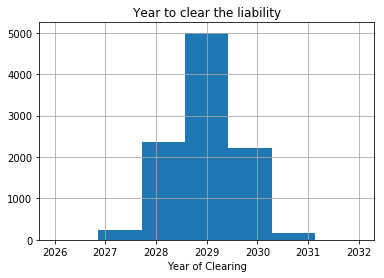

In [14]:
# Plot the histogram of debt clear year with the new profile

plt.hist(clear_yr_new, bins = len(clear_yr_new.unique()))
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel('Year of Clearing')
plt.title('Year to clear the liability')
plt.show()  

In [16]:
perc = (clear_yr_new < 2030).sum()/10000
print("{:.2%} percent of the MACSS graduates managed \
to pay off the loan within 10 years" \
     .format(perc))

76.02% percent of the MACSS graduates managed to pay off the loan within 10 years
